<a href="https://colab.research.google.com/github/yurim22/DeepLearning/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

import datetime

Using TensorFlow backend.


In [2]:
data = pd.read_csv('sample_data/sam_ba.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-10,135000.0,148000.0,125500.0,144000.0,144000.0,7179018.0
1,2016-11-11,149500.0,186500.0,142000.0,161500.0,161500.0,8140539.0
2,2016-11-14,165000.0,177500.0,165000.0,175500.0,175500.0,2977177.0
3,2016-11-15,179000.0,181500.0,162500.0,166000.0,166000.0,2592949.0
4,2016-11-16,168500.0,173000.0,163500.0,170000.0,170000.0,1660976.0


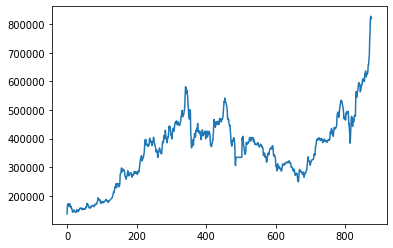

In [3]:
dataset = data.dropna()
high_prices = dataset['High'].values
low_prices = dataset['Low'].values
mid_prices = (high_prices+low_prices)/2

plt.plot(mid_prices)

In [4]:
seq_len = 30
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [5]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((761, 30, 1), (85, 30, 1))

In [6]:
# model = tf.keras.Sequential([
#                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30, return_sequences=True)),
#                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#                              tf.keras.layers.Dense(1, activation="relu")])
# model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(1e-4),
#               metrics = ['accuracy'])

model = Sequential()

model.add(LSTM(30, return_sequences=True, input_shape=(30, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model = tf.keras.Sequential([
#                              tf.keras.layers.LSTM(30, return_sequences=True),
#                              tf.keras.layers.LSTM(64, return_sequences=True),
#                              tf.keras.layers.Dense(1, activation="relu")])
# model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(1e-4),
#               metrics = ['accuracy'])

# model.summary()

# model = tf.keras.Sequential()

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30, return_sequences=True)))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)))

# model.add(tf.keras.layers.Dense(1, activation='relu'))

# model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(1e-4),
#               metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
                    batch_size = 10, epochs=20)

Train on 761 samples, validate on 85 samples
Epoch 1/20
761/761 [==============================] - 3s 4ms/step - loss: 0.0052 - val_loss: 0.0093
Epoch 2/20
761/761 [==============================] - 2s 3ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 3/20
761/761 [==============================] - 2s 3ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 4/20
761/761 [==============================] - 2s 3ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 5/20
761/761 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 6/20
761/761 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 7/20
761/761 [==============================] - 2s 3ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 8/20
761/761 [==============================] - 2s 3ms/step - loss: 9.6323e-04 - val_loss: 0.0020
Epoch 9/20
761/761 [==============================] - 2s 3ms/step - loss: 8.2803e-04 - val_loss: 0.0018
Epoch 10/20
761/761 [==========================

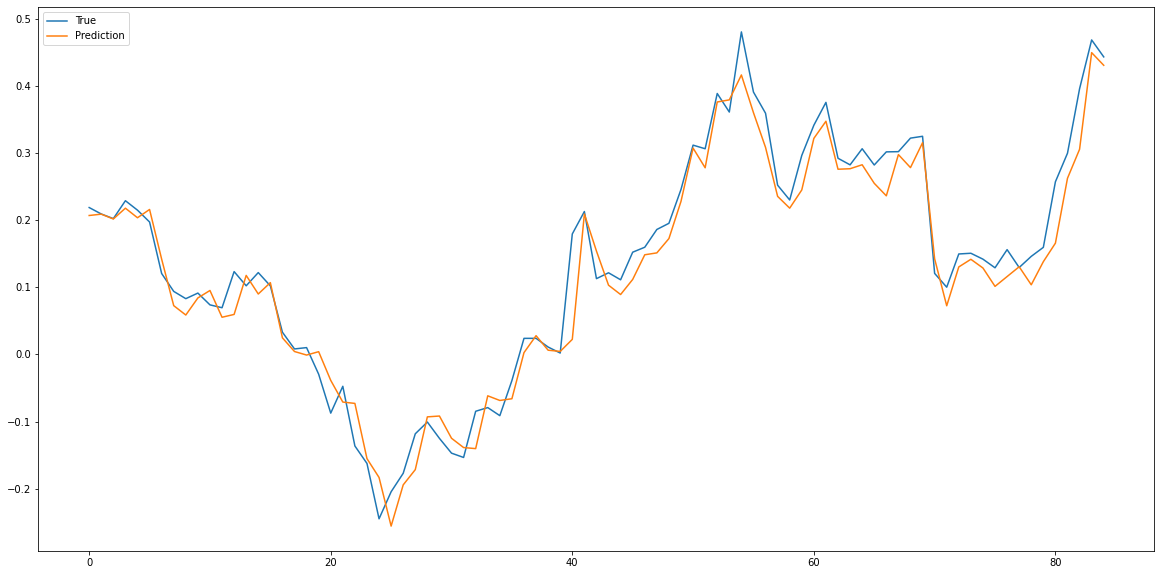

In [8]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

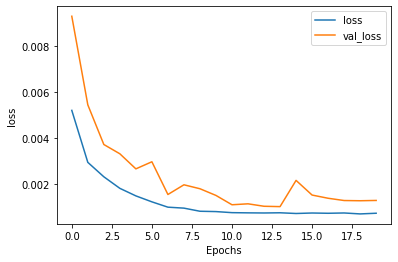

In [9]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()


plot_graphs(history, 'loss')